**Zadanie 1 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Cel ćwiczenia:** wykazanie równoważności między klasyfikatorem typu Naiwny Bayes implementowanym samodzielnie a wbudowanym (w tym przypadku klasyfikatorem GaussianNB pakietu scikit-learn).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
import math as mt

Przygotowanie zbioru danych przez wylosowanie z dwuwymiarowych rozkładów Gaussa o zadanych parametrach oraz deklaracja listy etykiet klas (labels):

In [2]:
class1 = np.zeros((2, 40))
class2 = np.zeros((2, 30))

In [3]:
class1[0,:] = np.random.normal(loc=(-3), scale=4.0, size=(1, 40))
class1[1,:] = np.random.normal(loc=(-1), scale=4.0, size=(1, 40))

In [4]:
class2[0,:] = np.random.normal(loc=(2), scale=1.0, size=(1, 30))
class2[1,:] = np.random.normal(loc=(2), scale=1.0, size=(1, 30))

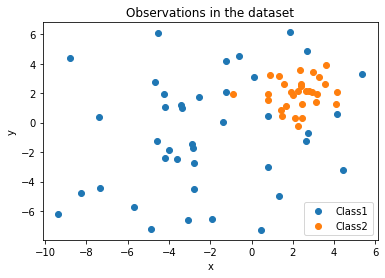

In [5]:
fig, ax = plt.subplots(); 
ax.scatter(class1[0,:], class1[1,:], label='Class1');
ax.scatter(class2[0,:], class2[1,:], label='Class2');
ax.set_xlabel('x'); 
ax.set_ylabel('y');
ax.set_title('Observations in the dataset')
ax.legend()
plt.show()

In [6]:
labels = [0 for ii in range(0, 40)]
labels += [1 for ii in range(0, 30)]

In [7]:
data = np.concatenate((class1, class2), axis=1)

In [8]:
data = np.transpose(data)

Przygotowanie siatki do zwizualizowania hiperpowierzchni klasyfikatora:

In [9]:
h=0.2
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.c_[xx.ravel(), yy.ravel()]
print(Z.shape)

(5688, 2)


Klasyfikator wbudowany GaussianNB:

In [10]:
clf = GaussianNB()
clf.fit(data, labels);

GaussianNB(priors=None, var_smoothing=1e-09)

Przygotowanie klasyfikatora "od podstaw":

In [12]:
from scipy.stats import norm

mean1 = np.mean(class1, axis=1) 
mean2 = np.mean(class2, axis=1)

std1 = np.std(class1, axis = 1) 
std2 = np.std(class2, axis = 1)
proba1 = 4./7.
proba2 = 3./7.

prediction_c1 = np.zeros(Z[:,0].size)
prediction_c2 = np.zeros(Z[:,0].size)

tmp1 = np.zeros(Z[:,0].size)
tmp2 = np.zeros(Z[:,0].size)

for x in range(Z[:,0].size):
    prediction_c1[x] = proba1 * norm(loc=mean1[0], scale=std1[0]).pdf(Z[x][0]) * norm(loc=mean1[1], scale=std1[1]).pdf(Z[x][1])
    prediction_c2[x] = proba2 * norm(loc=mean2[0], scale=std2[0]).pdf(Z[x][0]) * norm(loc=mean2[1], scale=std2[1]).pdf(Z[x][1])

tmp1 = prediction_c1/(prediction_c1 + prediction_c2)
tmp2 = prediction_c2/(prediction_c1 + prediction_c2)

prob_manual = np.vstack((tmp1, tmp2)).T 

Wizualizacja wyników:

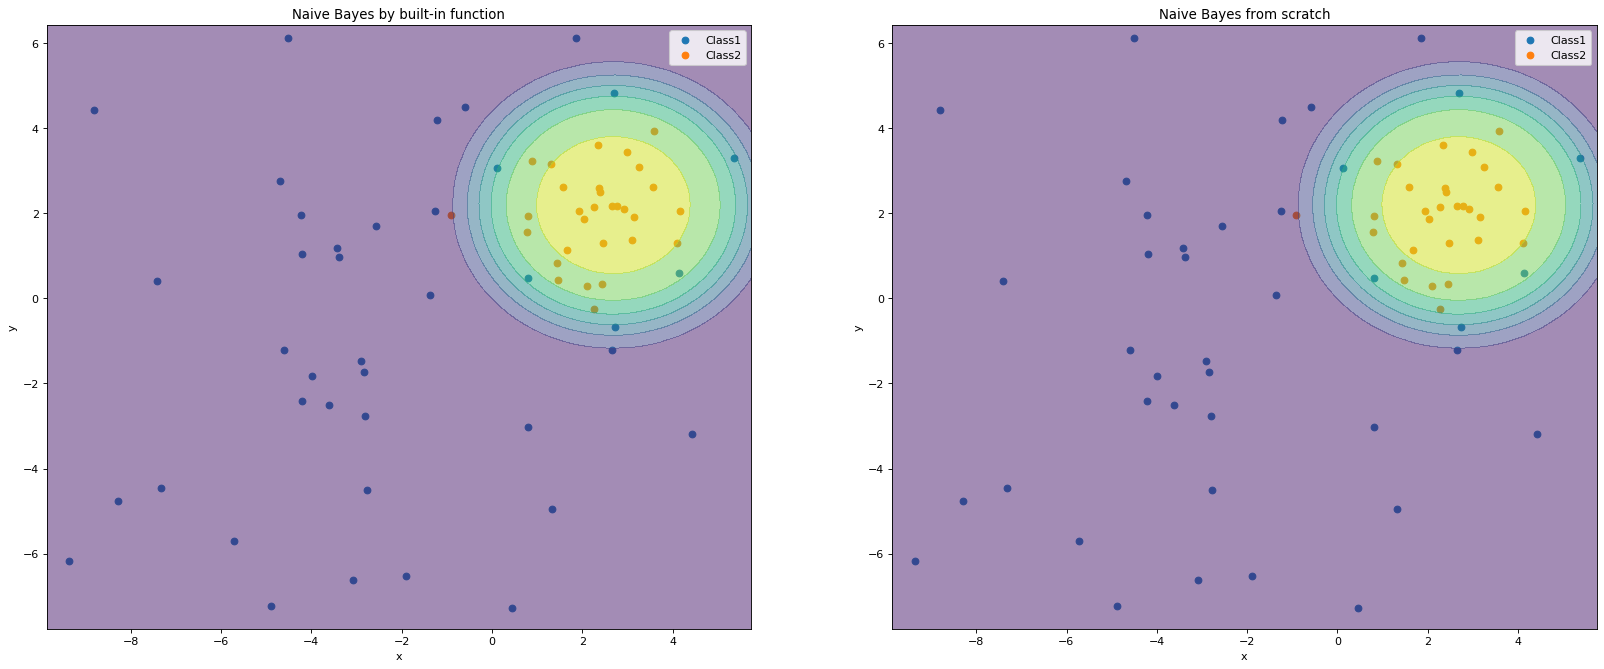

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 10), dpi = 80); 

ax1.scatter(class1[0,:], class1[1,:], label='Class1');
ax1.scatter(class2[0,:], class2[1,:], label='Class2');

ax2.scatter(class1[0,:], class1[1,:], label='Class1');
ax2.scatter(class2[0,:], class2[1,:], label='Class2');

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax1.contourf(xx, yy, Z,  alpha=.5)

Z = prob_manual[:, 1].reshape(xx.shape)
ax2.contourf(xx, yy, Z,  alpha=.5)

ax1.set_xlabel('x'); 
ax1.set_ylabel('y');
ax1.set_title('Naive Bayes by built-in function')
ax2.set_xlabel('x'); 
ax2.set_ylabel('y');
ax2.set_title('Naive Bayes from scratch')

ax1.legend()
ax2.legend()


plt.show()

Wniosek: Na podstawie powyższych wykresów można uznać równoważność pomiędzy podejściem opisanym w instrukcji do laboratorium, a rezultatami otrzymanymi za pomocą klasyfikatora GaussianNB z pakietu scikit-learn.